In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/Han/Desktop/Statistics/Python/Dataset/Seoul_Happiness_2014_train.csv')

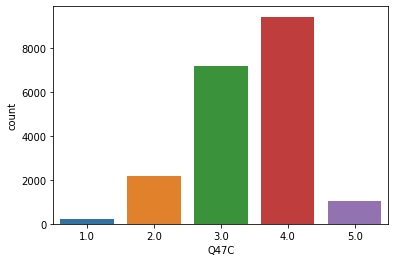

In [3]:
sns.countplot(data['Q47C'])

In [4]:
hans = pd.DataFrame([])

# Q43 귀하는 보행환경이 만족스러우신가요?

In [5]:
# 거주지역 인근의 보행환경 만족도 조사. 5= 매우만족/ 1=매우 불만족
# 이 때에 두 값은 매우 관련이 있어보이므로, 두 값을 plot 으로 비교해보자.

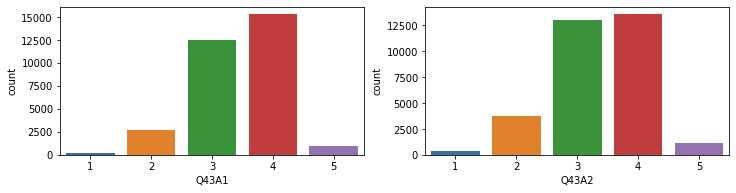

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(221)
sns.countplot(data['Q43A1'])
plt.subplot(222)
sns.countplot(data['Q43A2'])

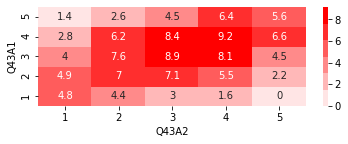

In [7]:
data_size=data.pivot_table(index='Q43A1',columns='Q43A2',aggfunc='size') 
data_size=np.log(data_size)
plt.subplot(211)
sns.heatmap(data_size, annot=True,cmap=sns.light_palette('red'))
plt.gca().invert_yaxis()

In [8]:
hans['Q43']=data['Q43A1'] + data['Q43A2']

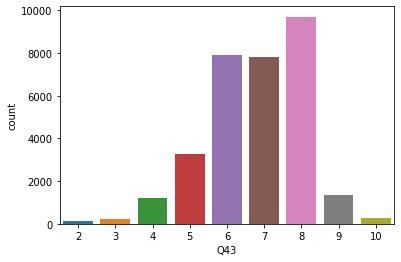

In [9]:
sns.countplot(hans['Q43'])
# 보통이 3인것을 고려하면 , 사람들이 대게 보통으로 대답한다는 경향을 생각할 때에 
#234 = 부정 
#567 = 보통
#8910 = 긍정 으로 두자.

In [10]:
hans.loc[(data['Q43A1'] + data['Q43A2'] <= 5) ,'Q43'] = 0 # 불만족 0
hans.loc[(data['Q43A1'] + data['Q43A2'] > 5) & (data['Q43A1'] + data['Q43A2']  < 8 ) ,'Q43'] = 1 #보통 =1
hans.loc[(data['Q43A1'] + data['Q43A2'] >=8 ) ,'Q43'] = 2  # 만족 2
hans.head()

,Q43
0,1
1,2
2,2
3,2
4,2


In [11]:
hans['Q43'].value_counts()

1    15692
2    11340
0     4816
Name: Q43, dtype: int64

In [12]:
hans = pd.get_dummies(hans, columns=['Q43'],drop_first=True)

In [13]:
hans.head()

,Q43_1,Q43_2
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


# Q44 귀하는 현재 자전거를 이용하고, 만족스러우신가요?

In [14]:
# 과연 자전거를 어떤 수단으로 이동하고 있느냐가, 이용환경에대한 만족도에 대해 영향을 끼치고 있을까?

Text(0.5, 1.0, 'for moving')

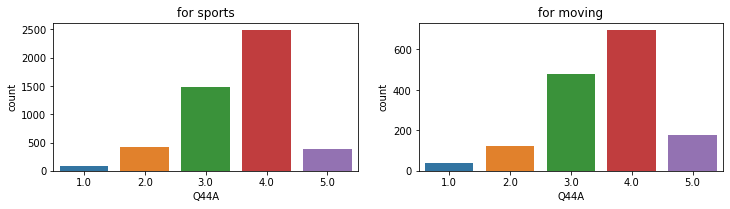

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(221)
sns.countplot(data.loc[data['Q44'] == 2,'Q44A'])
plt.title('for sports')

plt.subplot(222)
sns.countplot(data.loc[data['Q44'] == 1,'Q44A'])
plt.title('for moving')

In [16]:
# 우선 어떤 수단으로 사용하든, 이용환경에 대한 만족도는 비슷한거 같다.. 

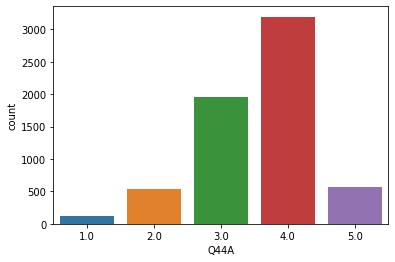

In [17]:
sns.countplot(data['Q44A'])

In [18]:
# 이 경우 불만족(1,2) 보통(3) 만족(4,5) 로 나누는게 좋아보인다?

In [19]:
hans['Q44']=data['Q44']

In [20]:
hans.head() 

,Q43_1,Q43_2,Q44
0,1,0,3
1,0,1,3
2,0,1,3
3,0,1,3
4,0,1,3


In [21]:
hans['Q44A'] = data['Q44A']
# 자전거를 이용하지 않으면 Q44A 에서 nan 으로 나타날 것이다.
hans.loc[(data['Q44A'] == 1) | (data['Q44A'] == 2) ,'Q44A'] = 1 # 불만족 1
hans.loc[(data['Q44A'] == 3) ,'Q44A'] = 2  # 보통 2
hans.loc[(data['Q44A'] == 4) | (data['Q44A'] == 5) ,'Q44A'] = 3 #만족 3

In [22]:
hans_ = hans.copy()

In [23]:
hans_['Q44A'] =hans_['Q44A'].fillna(0).astype('int')
hans_[['Q44','Q44A']]=hans_[['Q44','Q44A']].astype('str')

In [24]:
hans['Q.44']=hans_['Q44'] + hans_['Q44A']

In [25]:
hans.drop(['Q44','Q44A'],axis=1,inplace=True);

In [26]:
hans.columns=['Q43_1', 'Q43_2', 'Q44']

In [27]:
hans=pd.get_dummies(hans, columns=['Q44'],drop_first=True)

In [28]:
hans.head()

,Q43_1,Q43_2,Q44_12,Q44_13,Q44_21,Q44_22,Q44_23,Q44_30
0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1


# Q45 서울의 교통수단에 대한 만족도

In [29]:
data.loc[:,'Q45A1':'Q45A3'].isnull().sum() # 이용하지 않는사람은 역시 없었다.

Q45A1    0
Q45A2    0
Q45A3    0
dtype: int64

Text(0.5, 1.0, 'Taxi')

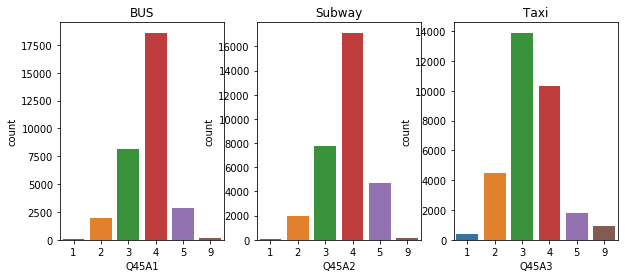

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(131)
sns.countplot(data['Q45A1'])
plt.title('BUS')

plt.subplot(132)
sns.countplot(data['Q45A2'])
plt.title('Subway')

plt.subplot(133)
sns.countplot(data['Q45A3'])
plt.title('Taxi')

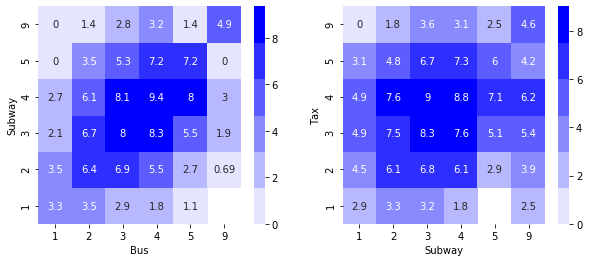

In [31]:
plt.figure(figsize=(10,4))
data_size=data.pivot_table(index='Q45A1',columns='Q45A2',aggfunc='size') 
data_size=np.log(data_size)
plt.subplot(121)
sns.heatmap(data_size, annot=True,cmap=sns.light_palette('blue'))
plt.xlabel('Bus')
plt.ylabel('Subway')
plt.gca().invert_yaxis()

plt.subplot(122)
data_size_2=data.pivot_table(index='Q45A1',columns='Q45A3',aggfunc='size') 
data_size_2=np.log(data_size_2)
sns.heatmap(data_size_2, annot=True,cmap=sns.light_palette('blue'))
plt.xlabel('Subway')
plt.ylabel('Tax')
plt.gca().invert_yaxis()

In [32]:
data.loc[:,'Q45A1':'Q45A3'].corr()

,Q45A1,Q45A2,Q45A3
Q45A1,1.000000,0.531844,0.228618
Q45A2,0.531844,1.000000,0.208160
Q45A3,0.228618,0.208160,1.000000


어느정도 선형성이 있으니까 버스와 지하철의 만족도는 같이 취급하는걸로..?

In [33]:
hans_ = hans.copy()

In [34]:
hans_=pd.concat([hans_,data.loc[:,'Q45A2':'Q45A3']],axis=1)

In [35]:
hans_.head()

,Q43_1,Q43_2,Q44_12,Q44_13,Q44_21,Q44_22,Q44_23,Q44_30,Q45A2,Q45A3
0,1,0,0,0,0,0,0,1,3,4
1,0,1,0,0,0,0,0,1,3,4
2,0,1,0,0,0,0,0,1,4,3
3,0,1,0,0,0,0,0,1,5,4
4,0,1,0,0,0,0,0,1,4,3


In [36]:
hans_['Q45A2']. value_counts()

4    17134
3     7796
5     4740
2     1933
9      159
1       86
Name: Q45A2, dtype: int64

In [37]:
hans_.loc[(data['Q45A2'] == 9) ,'Q45A2'] = 0 # 이용안함
hans_.loc[(data['Q45A2'] == 1) | (data['Q45A2'] == 2) ,'Q45A2'] = 1 # 불만족 1
hans_.loc[(data['Q45A2'] == 3) ,'Q45A2'] = 2  # 보통 2
hans_.loc[(data['Q45A2'] == 4) | (data['Q45A2'] == 5) ,'Q45A2'] = 3 #만족 3

hans_.loc[(data['Q45A3'] == 9) ,'Q45A3'] = 0 # 이용안함
hans_.loc[(data['Q45A3'] == 1) | (data['Q45A3'] == 2) ,'Q45A3'] = 1 # 불만족 1
hans_.loc[(data['Q45A3'] == 3) ,'Q45A3'] = 2  # 보통 2
hans_.loc[(data['Q45A3'] == 4) | (data['Q45A3'] == 5) ,'Q45A3'] =3

In [38]:
hans_ = pd.get_dummies(hans_, columns=['Q45A2','Q45A3'],drop_first=True)

In [39]:
hans = hans_

# Q46 서울의 버스 서비스 에대한 만족도

In [40]:
hans_ = hans.copy()

In [41]:
np.where(data.columns.values == 'Q46A1')

(array([173], dtype=int64),)

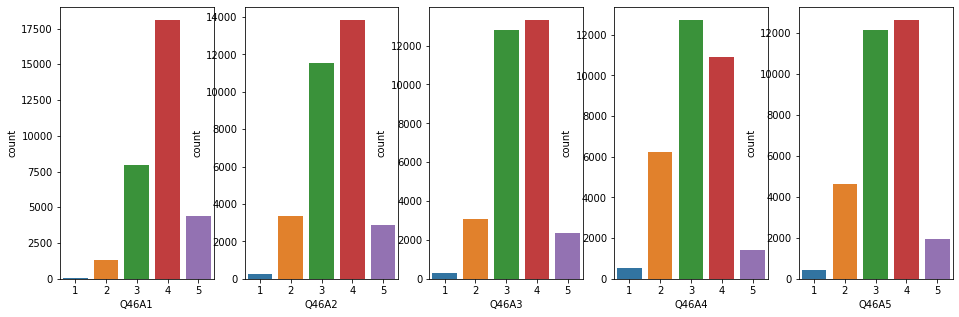

In [42]:
data.loc[:,'Q46A1':'Q46A5'];
plt.figure(figsize=(16,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    sns.countplot(data.iloc[:,173+i])

C:\Users\Han\Anaconda3\lib\site-packages\matplotlib\colors.py:1062: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


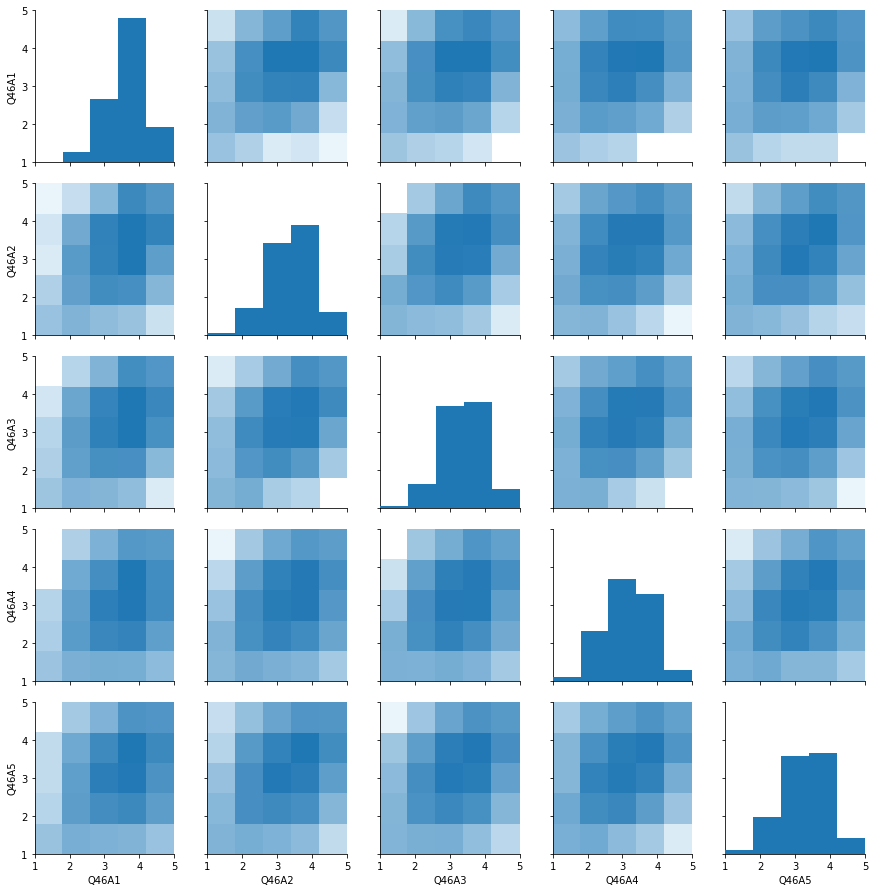

In [43]:
g = sns.PairGrid(data.loc[:,'Q46A1':'Q46A5'])
g.map_diag(plt.hist, bins=5)
from matplotlib.colors import LogNorm

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)

g.map_offdiag(pairgrid_heatmap, bins=5,norm=LogNorm())

In [44]:
data.loc[:,'Q46A1':'Q46A5']

,Q46A1,Q46A2,Q46A3,Q46A4,Q46A5
0,4,5,4,4,4
1,4,5,4,4,5
2,5,4,4,2,4
3,5,5,5,2,5
4,5,5,5,2,5
5,4,5,4,3,5
6,4,3,4,3,4
7,4,5,4,5,4
8,4,3,4,3,3
9,4,5,4,4,4


In [45]:
hans_['Q46_']=np.sum(data.loc[:,'Q46A1':'Q46A5'],axis=1)

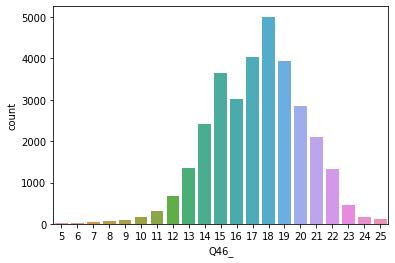

In [46]:
sns.countplot(hans_['Q46_'])

In [47]:
#평균이 15인것을 고려하면  5~13 까지가 불만족, 14~17 까지가 보통 18~25 까지를 만족으로 잡자.

In [48]:
hans_.loc[( hans_['Q46_'] <=13) ,'Q46'] = 0 # 불만족 0
hans_.loc[( hans_['Q46_'] > 13) & (hans_['Q46_'] < 18 ) ,'Q46'] = 1 #보통 =1
hans_.loc[( hans_['Q46_'] >=18) ,'Q46'] = 2  # 만족 2
hans_= pd.get_dummies(hans_, columns=['Q46'],drop_first=True)

In [49]:
hans_.drop('Q46_',inplace=True,axis=1)

In [50]:
hans=hans_

# Q47 직업관련 질문

In [51]:
hans['Q47'] = data['Q47']
hans.loc[(data['Q47A'] == 1) | (data['Q47A'] == 2) ,'Q47'] = 1 # 고용주/ 단독자영업 
hans.loc[(data['Q47A'] == 3) ,'Q47'] = 2  # 상용근로자 2
hans.loc[(data['Q47A'] >= 4) ,'Q47'] = 3 # 무급/입시직/기타 3
hans.loc[(data['Q47']) ==2 , 'Q47' ] = 0 # 무직 =0
hans['Q47'].head()
hans = pd.get_dummies(hans, columns=['Q47'],drop_first=True)
hans.head()

,Q43_1,Q43_2,Q44_12,Q44_13,Q44_21,Q44_22,Q44_23,Q44_30,Q45A2_1,Q45A2_2,Q45A2_3,Q45A3_1,Q45A3_2,Q45A3_3,Q46_1.0,Q46_2.0,Q47_1,Q47_2,Q47_3
0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
3,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0


# Q47_b 귀하의 근무형태?

In [52]:
hans['Q47B'] = data['Q47B'].fillna(0).astype('int')

In [53]:
hans=pd.get_dummies(hans, columns=['Q47B'],drop_first=True)

# Q47_c직업이 만족스러우신가요?

In [54]:
hans['Q47C'] = data['Q47C'].fillna(0).astype('int') #무직은 0...
hans = pd.get_dummies(hans, columns=['Q47C'],drop_first=True)

# Q48 은퇴시기는 언제로?

In [55]:
hans['Q48'] = data['Q48']

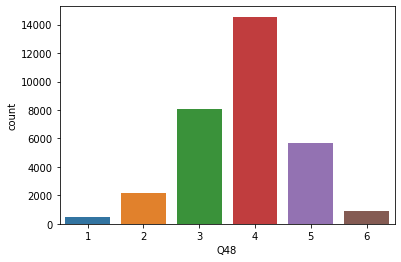

In [56]:
sns.countplot(data['Q48'])

In [57]:
hans.loc[(data['Q48'] <= 3) ,'Q48'] = 0 
hans.loc[(data['Q48'] == 4) ,'Q48'] = 1  
hans.loc[(data['Q48'] >= 5) ,'Q48'] = 2 

In [58]:
hans=pd.get_dummies(hans, columns=['Q48'],drop_first=True)

# 49 은퇴후의 월 소득!

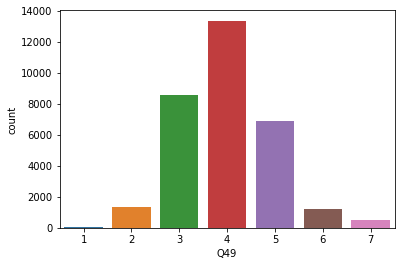

In [59]:
sns.countplot(data['Q49'])
#123/4/567
hans.loc[(data['Q49'] <= 3) ,'Q49'] = 0 
hans.loc[(data['Q49'] == 4) ,'Q49'] = 1  
hans.loc[(data['Q49'] >= 5) ,'Q49'] = 2 

In [60]:
hans['Q49']=hans['Q49'].astype('int')

In [61]:
hans=pd.get_dummies(hans, columns=['Q49'],drop_first=True)

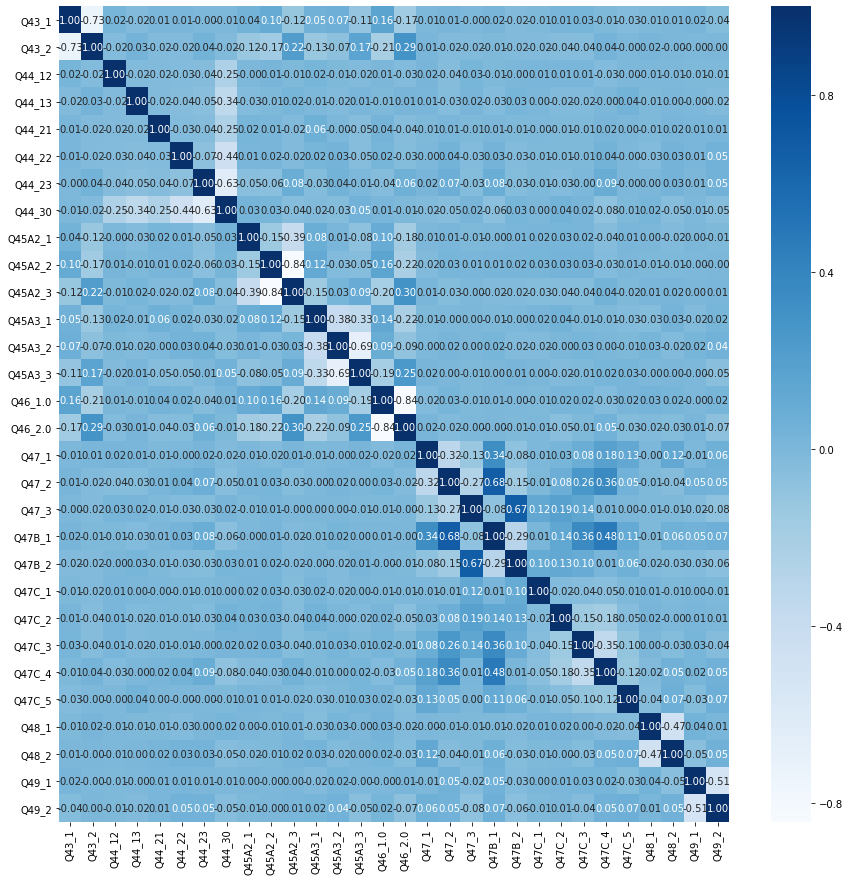

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(data = hans.corr(), annot=True, 
fmt = '.2f', cmap='Blues');

Q43 귀하는 보행환경이 만족스러우신가요?<br>
Q44 귀하는 현재 자전거를 이용하고, 만족스러우신가요?  0 은 자전거 미이용<br>
Q44_ 12 13 21 22 23 30 는 앞의 123 = 자전거 이용목적/ 뒤의 123 은 만족도, 0 은 사용하지 않음<br>
즉 13 = 자전거 이동수단, 만족 , 30 = 자전거 미이용
Q45 서울의 교통수단에 대한 만족도  <br>
버스의 경우는 corr 이 짙어서 drop 했다. <br>
Q46 서울의 버스 서비스 에대한 만족도 <br>
Q47 직업관련 질문 <br>
Q48 은퇴시기는 언제로?<br>
Q49 은퇴후의 월 소득!<br>


In [63]:
hans.to_csv('C:/Users/Han/Desktop/Statistics/Python/Dataset/pg5.csv')